In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sympy as sp

In [222]:
df=pd.read_csv('Indian_Kids_Screen_Time.csv')
df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [223]:
print("First 10 rows:")
print(df.head(10))

print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

First 10 rows:
   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   
5   14  Female                      4.88     Smartphone   
6   17    Male                      2.97             TV   
7   10    Male                      2.74             TV   
8   14    Male                      4.61         Laptop   
9   18    Male                      3.24         Tablet   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.3

In [224]:
print("\nMissing values:\n", df.isnull().sum())
print("\nNumber of duplicates:", df.duplicated().sum())

print("\nNumerical summary:\n", df.describe())
print("\nCategorical summary:\n", df.describe(include='object'))



Missing values:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

Number of duplicates: 44

Numerical summary:
                Age  Avg_Daily_Screen_Time_hr  \
count  9712.000000               9712.000000   
mean     12.979201                  4.352837   
std       3.162437                  1.718232   
min       8.000000                  0.000000   
25%      10.000000                  3.410000   
50%      13.000000                  4.440000   
75%      16.000000                  5.380000   
max      18.000000                 13.890000   

       Educational_to_Recreational_Ratio  
count                        9712.000000  
mean                            0.427226  
std                     

In [225]:
health_counts = df['Health_Impacts'].value_counts()
print("Number of students with Poor Sleep:", health_counts.get('Poor Sleep'))


Number of students with Poor Sleep: 2268


In [226]:
df['Health_Impacts'] = df['Health_Impacts'].fillna('UNKNOWN')

In [227]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


In [228]:
prim_dev=df['Primary_Device'].nunique()
print('Number of unique primary device:',prim_dev)

health_imp=df['Health_Impacts'].nunique()
print('Number of unique health impacts:',health_imp)

Number of unique primary device: 4
Number of unique health impacts: 16


In [229]:
common_device=df['Primary_Device'].mode()[0]
print('Most Common Device Type:',common_device)

max_screentime=df['Avg_Daily_Screen_Time_hr'].max()
print('Maximum screen time:',max_screentime)

Most Common Device Type: Smartphone
Maximum screen time: 13.89


**Part B**

Skewness: -0.0025333639793440194


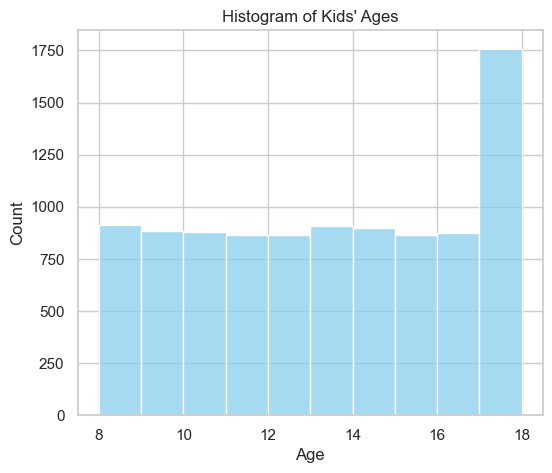

In [230]:
plt.figure(figsize=(6,5))
sns.histplot(df['Age'], bins=10,color='skyblue')
print("Skewness:", df['Age'].skew())
plt.title("Histogram of Kids' Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [231]:
top10_highest = df.nlargest(10, 'Avg_Daily_Screen_Time_hr')
print("Top 10 kids with highest daily screen time:")
print(top10_highest[['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device']])


Top 10 kids with highest daily screen time:
      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device
4298   10  Female                     13.89     Smartphone
934    10  Female                     13.01     Smartphone
1769    9    Male                     12.80             TV
1870   10    Male                     12.40     Smartphone
1321   10  Female                     12.09         Tablet
768     8    Male                     11.97         Tablet
2672    8  Female                     11.77     Smartphone
36     10    Male                     11.68             TV
7507    8    Male                     11.50             TV
6227   10  Female                     11.33     Smartphone


In [232]:
avg_location = df.groupby("Urban_or_Rural")['Avg_Daily_Screen_Time_hr'].mean()
print("\nAverage daily screen time by location:")
print(avg_location)


Average daily screen time by location:
Urban_or_Rural
Rural    4.373702
Urban    4.344123
Name: Avg_Daily_Screen_Time_hr, dtype: float64


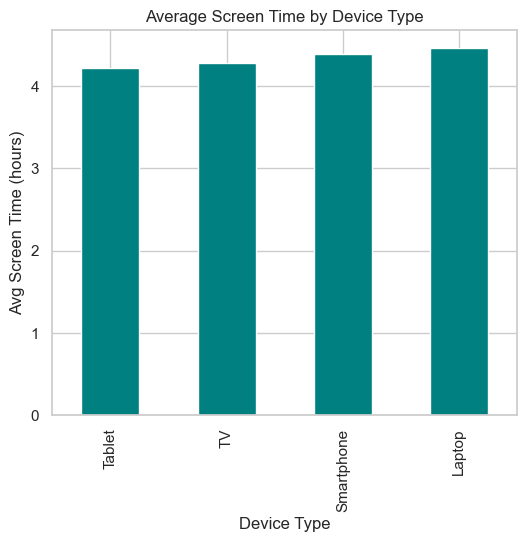

In [233]:
avg_device = df.groupby("Primary_Device")['Avg_Daily_Screen_Time_hr'].mean().sort_values()
plt.figure(figsize=(6,5))
avg_device.plot(kind='bar', color='teal')
plt.title("Average Screen Time by Device Type")
plt.ylabel("Avg Screen Time (hours)")
plt.xlabel("Device Type")
plt.show()

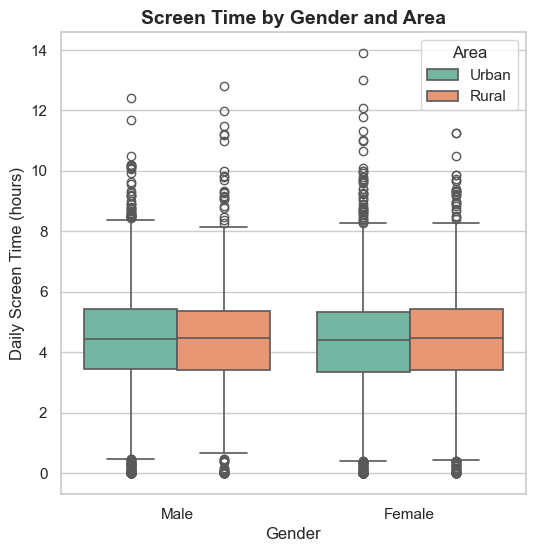

In [234]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Gender",y="Avg_Daily_Screen_Time_hr",hue="Urban_or_Rural",data=df,palette="Set2",linewidth=1.2)
plt.title("Screen Time by Gender and Area", fontsize=14, weight='bold')
plt.ylabel("Daily Screen Time (hours)")
plt.xlabel("Gender")
plt.legend(title="Area", loc="upper right")
plt.show()

In [235]:
top10_lowest = df.nsmallest(10, 'Avg_Daily_Screen_Time_hr')
print("\nTop 10 kids with lowest daily screen time:")
print(top10_lowest[['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device']])


Top 10 kids with lowest daily screen time:
     Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device
19     9  Female                       0.0             TV
46     9  Female                       0.0     Smartphone
58     9    Male                       0.0     Smartphone
92    10  Female                       0.0         Tablet
96    10    Male                       0.0     Smartphone
145    9  Female                       0.0         Tablet
287   10    Male                       0.0             TV
300    8    Male                       0.0     Smartphone
313    9    Male                       0.0         Tablet
322    8  Female                       0.0     Smartphone


**Part 3**

In [236]:
mean_screen = df['Avg_Daily_Screen_Time_hr'].mean()
median_screen = df['Avg_Daily_Screen_Time_hr'].median()
mode_screen = df['Avg_Daily_Screen_Time_hr'].mode()[0]

print("Mean Daily Screen Time:", round(mean_screen,2))
print("Median Daily Screen Time:", round(median_screen,2))
print("Mode Daily Screen Time:", round(mode_screen,2))

var_screen = df['Avg_Daily_Screen_Time_hr'].var()
std_screen = df['Avg_Daily_Screen_Time_hr'].std()

print("\nVariance of Daily Screen Time:", round(var_screen,2))
print("Standard Deviation of Daily Screen Time:", round(std_screen,2))

corr_age_screen = df['Age'].corr(df['Avg_Daily_Screen_Time_hr'])
print("\nCorrelation between Age and Screen Time:", round(corr_age_screen,3))

high_screen = (df['Avg_Daily_Screen_Time_hr'] > 5).mean() * 100
print("\nPercentage of Kids with Screen Time > 5 hours:", round(high_screen,2), "%")

Mean Daily Screen Time: 4.35
Median Daily Screen Time: 4.44
Mode Daily Screen Time: 0.0

Variance of Daily Screen Time: 2.95
Standard Deviation of Daily Screen Time: 1.72

Correlation between Age and Screen Time: 0.118

Percentage of Kids with Screen Time > 5 hours: 33.7 %


**Part 4**

In [237]:
age_array = df['Age'].to_numpy()
screen_array = df['Avg_Daily_Screen_Time_hr'].to_numpy()

print("Age Array:", age_array[:10])  # first 10 values
print("Screen Time Array:", screen_array[:10])

Age Array: [14 11 18 15 12 14 17 10 14 18]
Screen Time Array: [3.99 4.61 3.73 1.21 5.89 4.88 2.97 2.74 4.61 3.24]


In [238]:
subtraction = age_array - screen_array
print("\nVector Subtraction (Age - Screen Time):")
print(subtraction[:10])


Vector Subtraction (Age - Screen Time):
[10.01  6.39 14.27 13.79  6.11  9.12 14.03  7.26  9.39 14.76]


In [239]:
dot_product = np.dot(age_array, screen_array)
print("\nDot Product between Age and Screen Time:", dot_product)
norm = np.linalg.norm(screen_array)
normalized_screen = screen_array / norm

print("\nFirst 10 Normalized Screen Time values:")
print(normalized_screen[:10])


Dot Product between Age and Screen Time: 554936.35

First 10 Normalized Screen Time values:
[0.00865176 0.00999614 0.00808798 0.00262372 0.01277164 0.0105816
 0.00644003 0.00594131 0.00999614 0.00702549]


In [240]:
ScreenTime, Age = sp.symbols('ScreenTime Age')

Performance_Score = (ScreenTime**2) + 0.5*Age

derivative = sp.diff(Performance_Score, ScreenTime)
print("\nDerivative wrt ScreenTime:", derivative)


Derivative wrt ScreenTime: 2*ScreenTime


In [241]:
df['is_high_screen'] = (df['Avg_Daily_Screen_Time_hr'] >= 5).astype(int)

df['screen_time_category'] = pd.cut(
    df['Avg_Daily_Screen_Time_hr'],
    bins=[0, 3, 5, 100],
    labels=['Low', 'Medium', 'High']
)

df['edu_focus'] = (df['Educational_to_Recreational_Ratio'] >= 0.5).astype(int)

df['is_urban'] = (df['Urban_or_Rural'] == "Urban").astype(int)

df['has_health_impact'] = (df['Health_Impacts'] != "None").astype(int)


print(df.head()[[
    'Age','Avg_Daily_Screen_Time_hr','is_high_screen',
    'screen_time_category','edu_focus','is_urban','has_health_impact'
]])

   Age  Avg_Daily_Screen_Time_hr  is_high_screen screen_time_category  \
0   14                      3.99               0               Medium   
1   11                      4.61               0               Medium   
2   18                      3.73               0               Medium   
3   15                      1.21               0                  Low   
4   12                      5.89               1                 High   

   edu_focus  is_urban  has_health_impact  
0          0         1                  1  
1          0         1                  1  
2          0         1                  1  
3          0         1                  1  
4          0         1                  1  


**Part 7**

In [242]:
high_screen_time = df[df['Avg_Daily_Screen_Time_hr'] > 4]
high_screen_time.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,is_high_screen,screen_time_category,edu_focus,is_urban,has_health_impact
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,0,Medium,0,1,1
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,1,High,0,1,1
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,0,Medium,0,1,1
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,0,Medium,0,0,1
11,15,Female,4.94,TV,True,0.36,Poor Sleep,Rural,0,Medium,0,0,1


In [243]:
sorted_screen_time = df.sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False)
sorted_screen_time.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,is_high_screen,screen_time_category,edu_focus,is_urban,has_health_impact
4298,10,Female,13.89,Smartphone,True,0.58,"Eye Strain, Anxiety",Urban,1,High,1,1,1
934,10,Female,13.01,Smartphone,True,0.57,"Poor Sleep, Anxiety",Urban,1,High,1,1,1
1769,9,Male,12.80,TV,True,0.56,"Eye Strain, Anxiety",Rural,1,High,1,0,1
1870,10,Male,12.40,Smartphone,True,0.52,UNKNOWN,Urban,1,High,1,1,1
1321,10,Female,12.09,Tablet,True,0.45,Poor Sleep,Urban,1,High,0,1,1


In [244]:
kids_per_area = df.groupby('Urban_or_Rural')['Age'].count().reset_index()
kids_per_area.rename(columns={'Age': 'Num_Kids'}, inplace=True)
print("total kids in urban and rural:\n",kids_per_area)

total kids in urban and rural:
   Urban_or_Rural  Num_Kids
0          Rural      2861
1          Urban      6851


In [245]:
avg_screen_time_device = df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
top5_devices = avg_screen_time_device.sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False).head(5)
print("top 5 devices and their avg screen time:\n",top5_devices)

top 5 devices and their avg screen time:
   Primary_Device  Avg_Daily_Screen_Time_hr
0         Laptop                  4.459086
1     Smartphone                  4.388925
2             TV                  4.287752
3         Tablet                  4.226005


In [246]:
exceeded_count = df[df['Exceeded_Recommended_Limit'] == True].shape[0]
print("exceeded count:\n",exceeded_count)

exceeded count:
 8301


**Part 8**

In [247]:
print("Highest Screen Time Kid:")
print(df.loc[df['Avg_Daily_Screen_Time_hr'].idxmax()])

print("\nDevice with Highest Avg Screen Time:")
print(df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False).head(1))


print("\nArea with Most Kids:")
print(df['Urban_or_Rural'].value_counts().head(1))

print("\nCorrelation (Edu/Recreational vs Screen Time):")
print(df['Educational_to_Recreational_Ratio'].corr(df['Avg_Daily_Screen_Time_hr']))

print("\n% Exceeding Recommended Limit:")
print((df['Exceeded_Recommended_Limit'].sum() / len(df)) * 100)

Highest Screen Time Kid:
Age                                                   10
Gender                                            Female
Avg_Daily_Screen_Time_hr                           13.89
Primary_Device                                Smartphone
Exceeded_Recommended_Limit                          True
Educational_to_Recreational_Ratio                   0.58
Health_Impacts                       Eye Strain, Anxiety
Urban_or_Rural                                     Urban
is_high_screen                                         1
screen_time_category                                High
edu_focus                                              1
is_urban                                               1
has_health_impact                                      1
Name: 4298, dtype: object

Device with Highest Avg Screen Time:
Primary_Device
Laptop    4.459086
Name: Avg_Daily_Screen_Time_hr, dtype: float64

Area with Most Kids:
Urban_or_Rural
Urban    6851
Name: count, dtype: int64

Correlation

In [248]:
cols = ['Age', 'Educational_to_Recreational_Ratio', 'Avg_Daily_Screen_Time_hr']

skew_values = df[cols].skew()

print(skew_values)


Age                                 -0.002533
Educational_to_Recreational_Ratio    0.252592
Avg_Daily_Screen_Time_hr            -0.068933
dtype: float64


Skew BEFORE: 0.25259228729514854
Skew AFTER: 0.08523888503312875


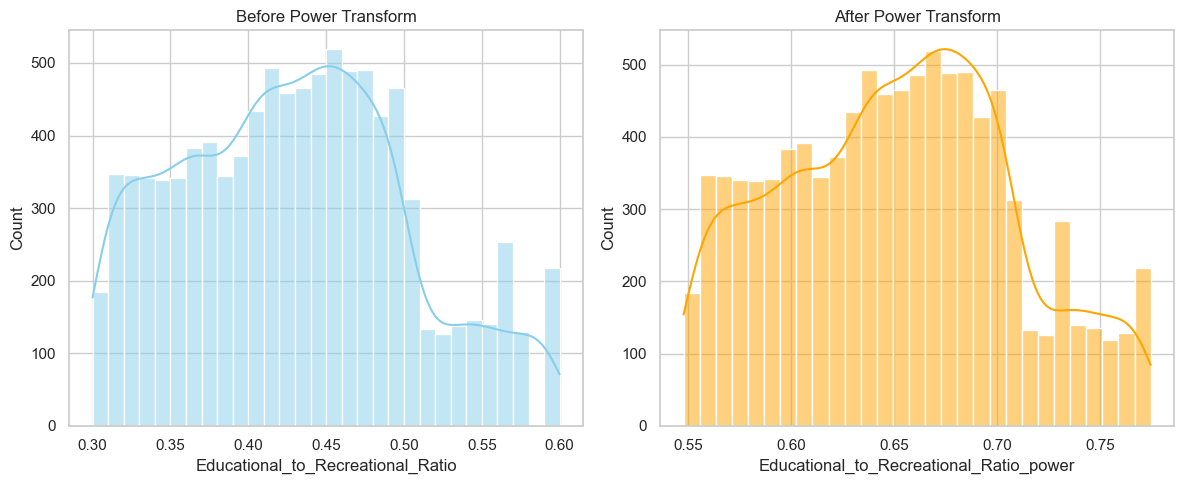

In [249]:
col = 'Educational_to_Recreational_Ratio'


print("Skew BEFORE:", df[col].skew())

df[col + '_power'] = np.power(df[col], 0.5) 

print("Skew AFTER:", df[col + '_power'].skew())

plt.figure(figsize=(12,5))

# BEFORE
plt.subplot(1,2,1)
sns.histplot(df[col], kde=True, color='skyblue')
plt.title('Before Power Transform')
plt.xlabel(col)

# AFTER
plt.subplot(1,2,2)
sns.histplot(df[col + '_power'], kde=True, color='orange')
plt.title('After Power Transform')
plt.xlabel(col + '_power')

plt.tight_layout()
plt.show()

In [250]:
df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,is_high_screen,screen_time_category,edu_focus,is_urban,has_health_impact,Educational_to_Recreational_Ratio_power
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,0,Medium,0,1,1,0.648074
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,0,Medium,0,1,1,0.547723
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,0,Medium,0,1,1,0.565685
3,15,Female,1.21,Laptop,False,0.39,UNKNOWN,Urban,0,Low,0,1,1,0.624500
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,1,High,0,1,1,0.700000


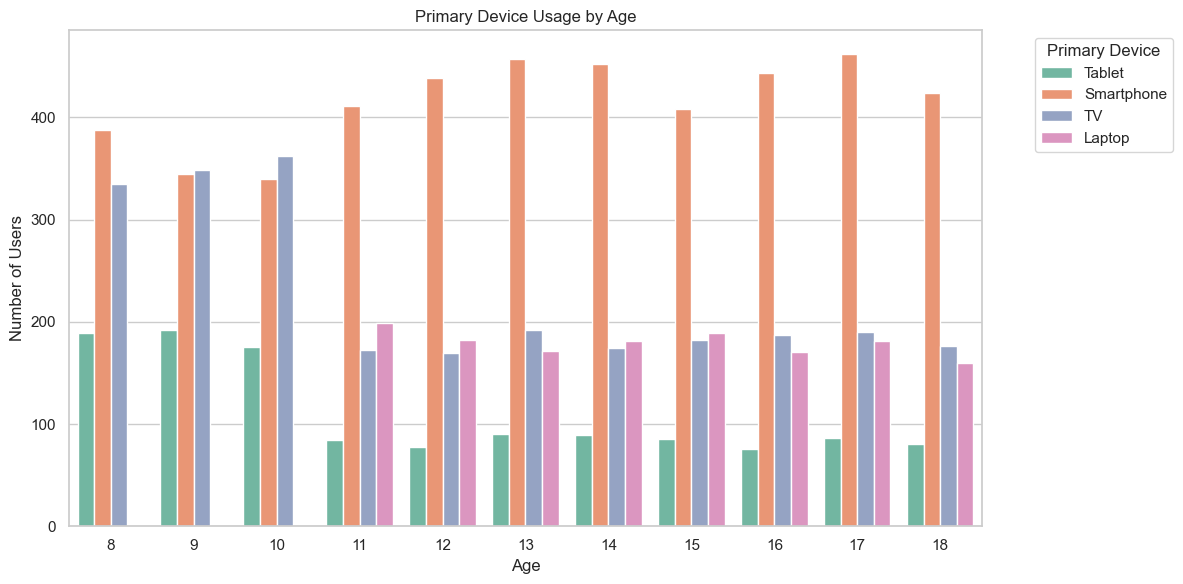

In [251]:
plt.figure(figsize=(12,6))

# Count of Primary Device usage by exact Age
sns.countplot(data=df, x='Age', hue='Primary_Device', palette='Set2')

plt.title("Primary Device Usage by Age")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.legend(title="Primary Device", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\NANDHANAA M\AppData\Local\Temp\ipykernel_16260\3582311858.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = filtered_df.groupby(['Age_Category', 'Health_Impacts']).size().reset_index(name='Count')


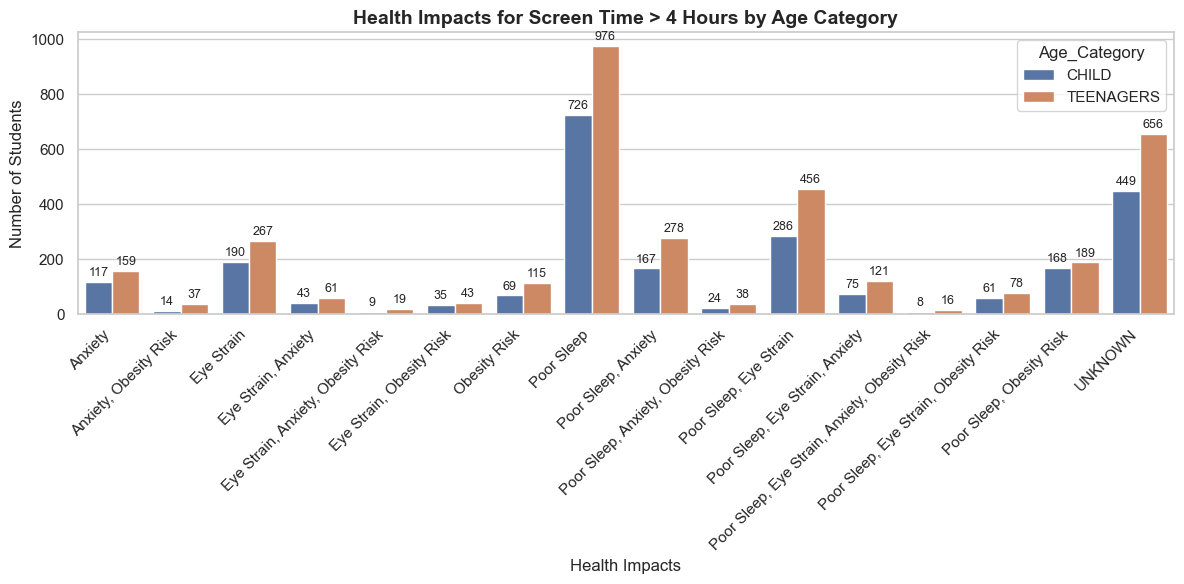

In [252]:
# Create Age_Category column based on Age
bins = [8, 12, 18]  # 7–12 for CHILD, 13–18 for TEENAGERS
labels = ['CHILD', 'TEENAGERS']

df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

filtered_df = df[df['Avg_Daily_Screen_Time_hr'] > 4]

count_data = filtered_df.groupby(['Age_Category', 'Health_Impacts']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=count_data,
    x='Health_Impacts',
    y='Count',
    hue='Age_Category',
    dodge=True
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Health Impacts', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Health Impacts for Screen Time > 4 Hours by Age Category', fontsize=14, weight='bold')
plt.tight_layout() 

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.show()

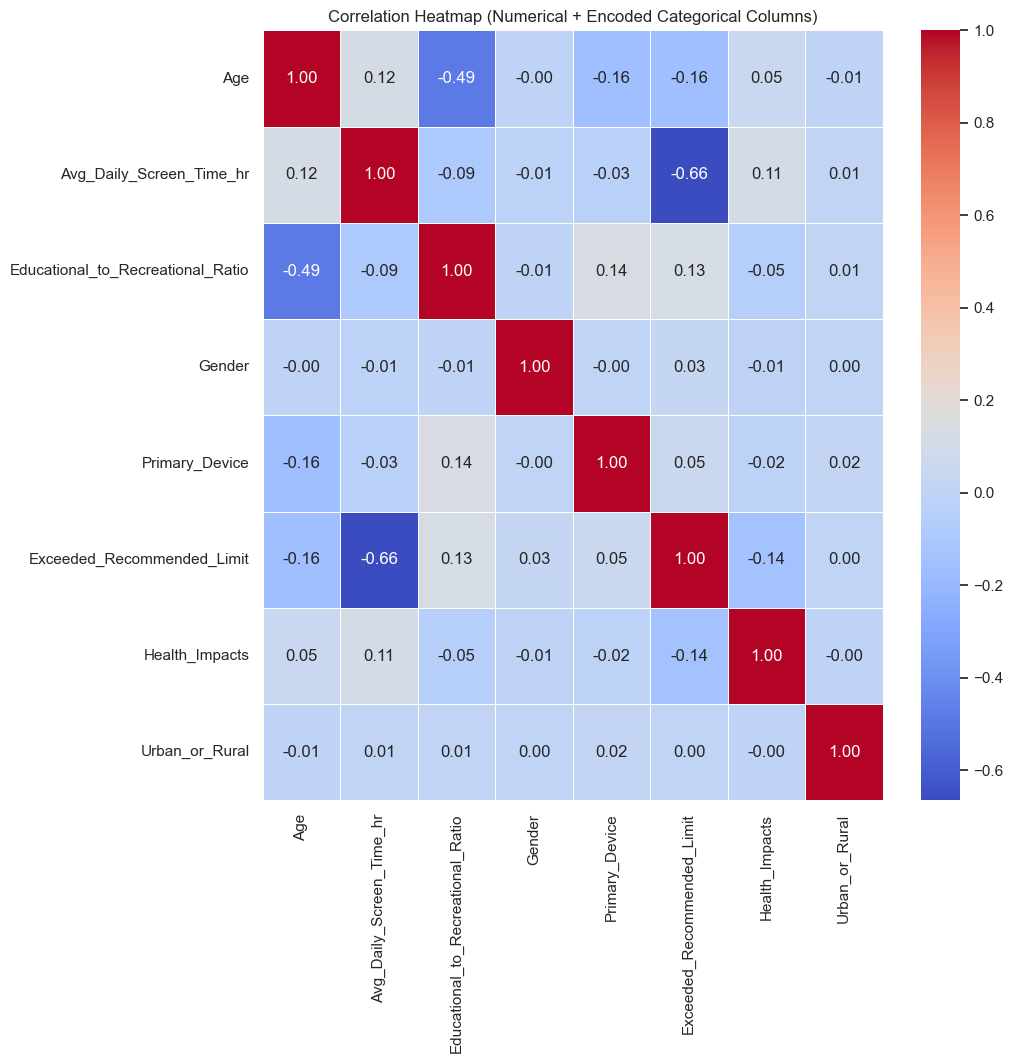

In [253]:
numeric_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']

categorical_cols = ['Gender', 'Primary_Device', 'Exceeded_Recommended_Limit', 
                    'Health_Impacts', 'Urban_or_Rural']

for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

all_numeric = numeric_cols + [col for col in categorical_cols]

corr_matrix = df[all_numeric].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical + Encoded Categorical Columns)")
plt.show()